<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Mini_Project_W6D5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from datetime import datetime

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [68]:
df = pd.read_csv("https://raw.githubusercontent.com/devtlv/MiniProject-DataAnalysis-W6D5-Apple_Stock_Data/main/AAPL%2C%201D%2001012007-12072023.csv")

In [69]:
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [70]:
df.isnull().sum()

volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


In [72]:
df['time'] = pd.to_datetime(df['time'], unit='s')
df['formatted_dates'] = df['time'].dt.strftime('%Y/%m/%d')
print(df)

            volume      vwap      open     close      high       low  \
0     1.245445e+09    3.0302    3.0821    2.9929    3.0921    2.9250   
1     8.554834e+08    3.0403    3.0018    3.0593    3.0696    2.9936   
2     8.352580e+08    3.0426    3.0632    3.0375    3.0786    3.0143   
3     7.974138e+08    3.0683    3.0700    3.0525    3.0904    3.0457   
4     3.352007e+09    3.1946    3.0875    3.3061    3.3207    3.0411   
...            ...       ...       ...       ...       ...       ...   
4154  4.515552e+07  190.8214  189.8400  191.8100  192.0200  189.2000   
4155  4.675750e+07  191.4218  191.4100  190.6800  192.6700  190.2400   
4156  5.991216e+07  188.3628  189.2600  188.6100  189.9900  187.0350   
4157  4.663812e+07  187.8219  189.1600  188.0800  189.3000  186.6000   
4158  3.642366e+07  190.0251  189.6800  190.0099  191.7000  188.4700   

                    time  transactions formatted_dates  
0    2007-01-03 05:00:00        189737      2007/01/03  
1    2007-01-04 05:00

volume: The volume of stock traded on that day.

vwap: Volume Weighted Average Price (VWAP), which represents the average price weighted by trading volume.

open: The opening price of the stock.

close: The closing price of the stock.

high: The highest price of the stock during the trading day.

low: The lowest price of the stock during the trading day.

time: The timestamp of the data.

transactions: The number of transactions that occurred during the trading day.

formatted_dates: The formatted date of the data.

Examine the time series properties of the data (e.g., frequency, trends).

In [73]:
# Compute summary statistics
summary_stats = df[['volume', 'vwap', 'open', 'close', 'high', 'low', 'transactions']].describe()

print("Summary Statistics for Key Columns:")
print(summary_stats)

Summary Statistics for Key Columns:
             volume         vwap         open        close         high  \
count  4.159000e+03  4159.000000  4159.000000  4159.000000  4159.000000   
mean   3.662925e+08    46.391382    46.362788    46.396058    46.881127   
std    3.724793e+08    50.277557    50.235593    50.293482    50.843874   
min    2.422234e+07     2.841000     2.835400     2.792900     2.928600   
25%    1.067497e+08    11.936200    11.955700    11.947150    12.028400   
50%    2.136463e+08    25.885200    25.775000    25.825000    26.262800   
75%    4.965321e+08    52.154150    52.263750    52.231250    52.626250   
max    3.373042e+09   193.102000   193.780000   193.970000   194.480000   

               low  transactions  
count  4159.000000  4.159000e+03  
mean     45.865790  2.709318e+05  
std      49.680104  2.510859e+05  
min       2.792900  3.048700e+04  
25%      11.853600  1.128150e+05  
50%      25.680000  1.782460e+05  
75%      51.796250  3.259555e+05  
max     

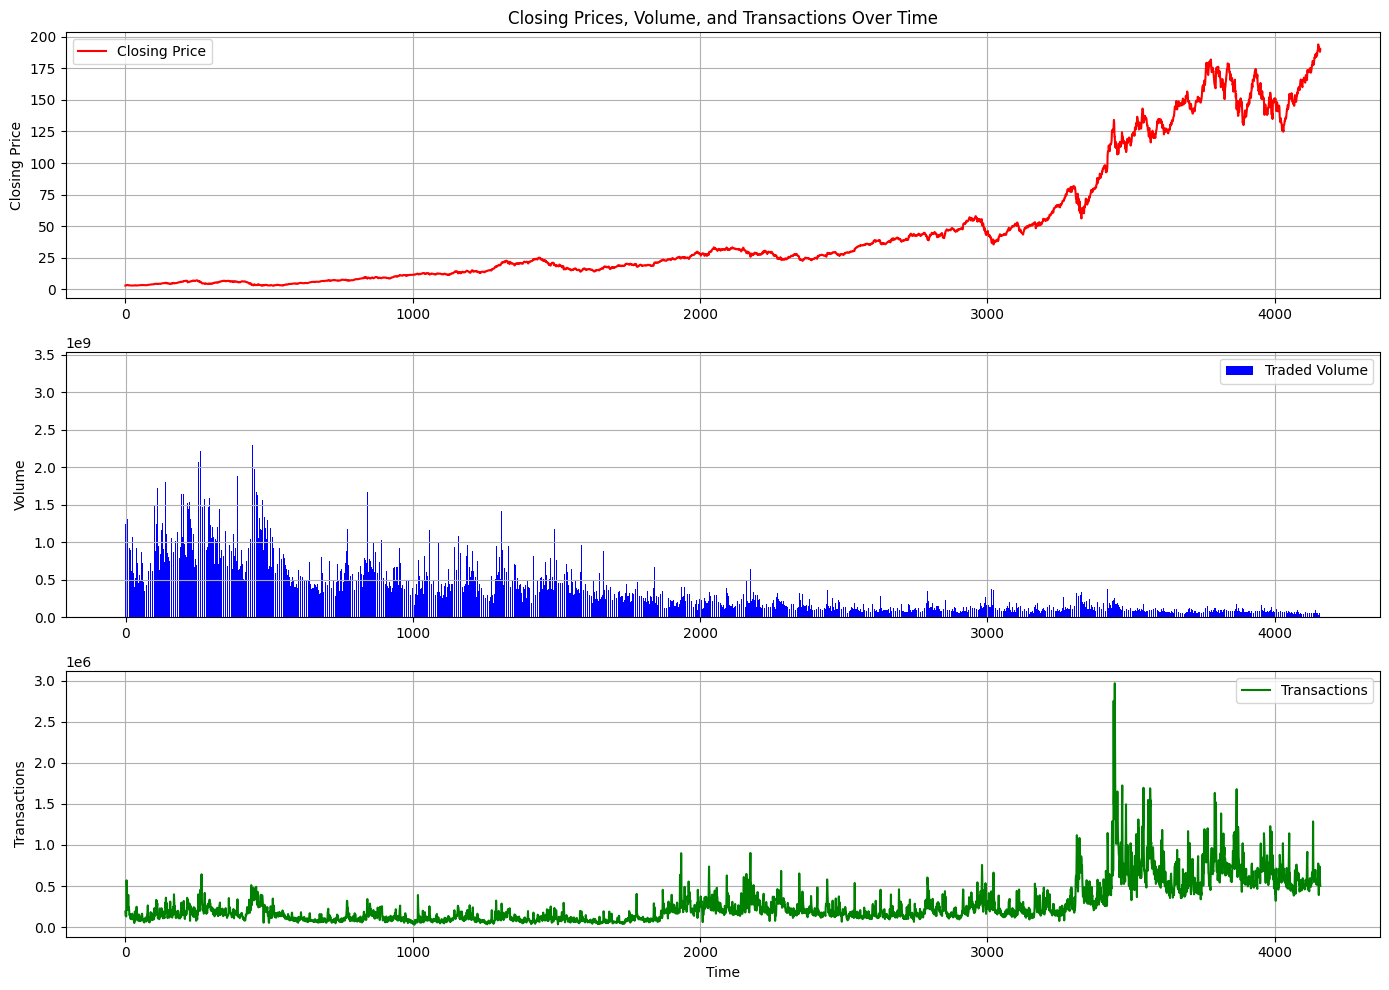

In [74]:
# Plotting Closing Prices, Traded Volume, and Transactions over Time
plt.figure(figsize=(14, 10))

# Closing Prices Plot
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot(df.index, df['close'], label='Closing Price', color='red')
plt.title('Closing Prices, Volume, and Transactions Over Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=0)  # Rotating the x-axis labels to make them more readable
plt.grid(True)
plt.legend()

# Traded Volume Plot
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.bar(df.index, df['volume'], label='Traded Volume', color='blue')
plt.ylabel('Volume')
plt.xticks(rotation=0)  # Rotating the x-axis labels to make them more readable
plt.grid(True)
plt.legend()

# Transactions Plot
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.plot(df.index, df['transactions'], label='Transactions', color='green')
plt.xlabel('Time')
plt.ylabel('Transactions')
plt.xticks(rotation=0)  # Rotating the x-axis labels to make them more readable
plt.grid(True)
plt.legend()

plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()

The correlation coefficient between transactions and volume in your dataset is approximately -0.21.

A negative correlation suggests that there might be a weak inverse relationship between transactions and volume. However, it's important to interpret this correlation in the context of the specific data and market conditions.

While it's less common to see a negative correlation between transactions and volume in stock market data, it's not entirely unexpected. This could potentially indicate that during periods of higher trading volume, individual transactions are smaller in size. Conversely, during periods of lower trading volume, individual transactions might be larger in size.

Text(0.5, 1.0, 'Correlation Heatmap')

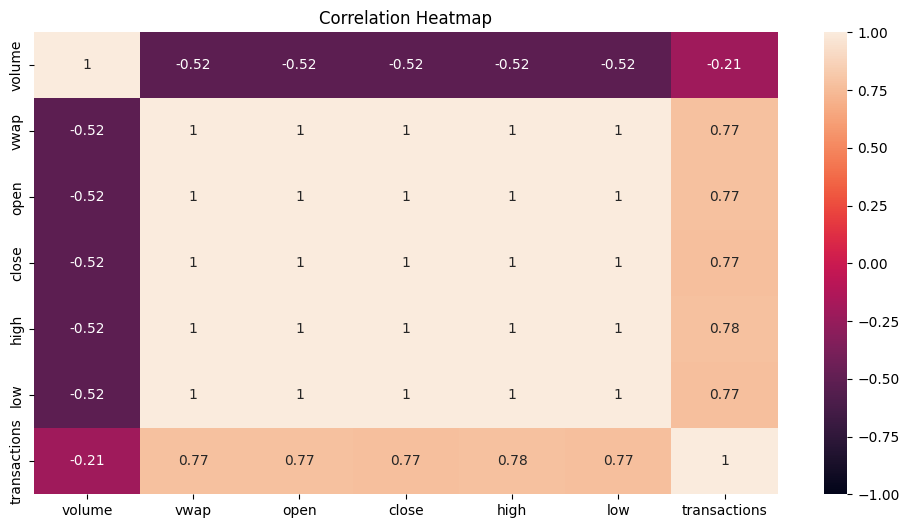

In [75]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
# correlation = numeric_data_appl.corr()

plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(numeric_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')

In [76]:
# Calculate correlation coefficient between transactions and volume
correlation = df['transactions'].corr(df['close'])
print("Correlation between transactions and close price:", correlation)

Correlation between transactions and close price: 0.7731522740848948


The correlation coefficient between transactions and the closing price in your dataset is approximately 0.7732.

A correlation coefficient close to 1 indicates a strong positive correlation between transactions and the closing price. This suggests that there is a significant relationship between the number of transactions executed and the closing price of the stock.

In the context of stock market data, a high positive correlation between transactions and the closing price is expected. Generally, when there is higher trading activity (more transactions), it often corresponds to changes in the stock price, particularly at the end of the trading day when the closing price is determined.

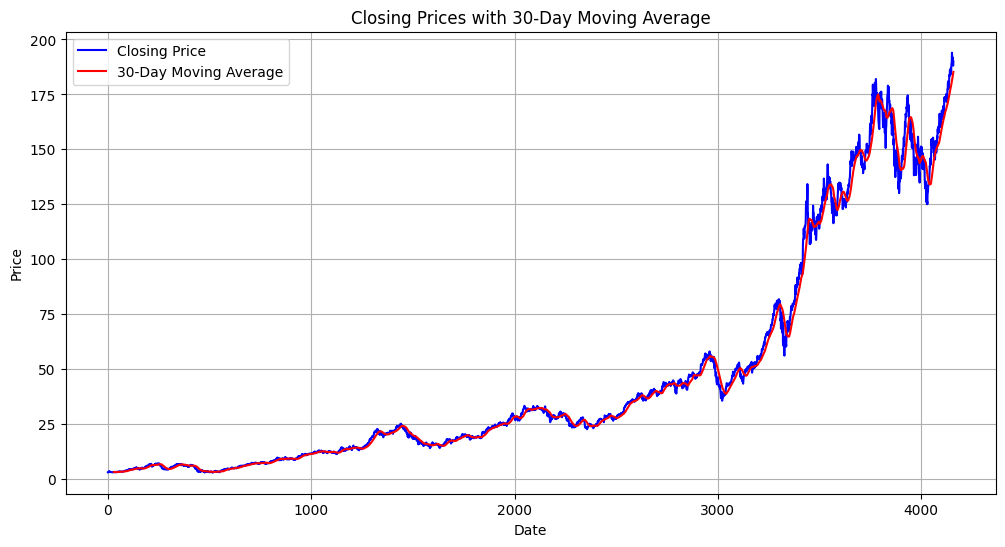

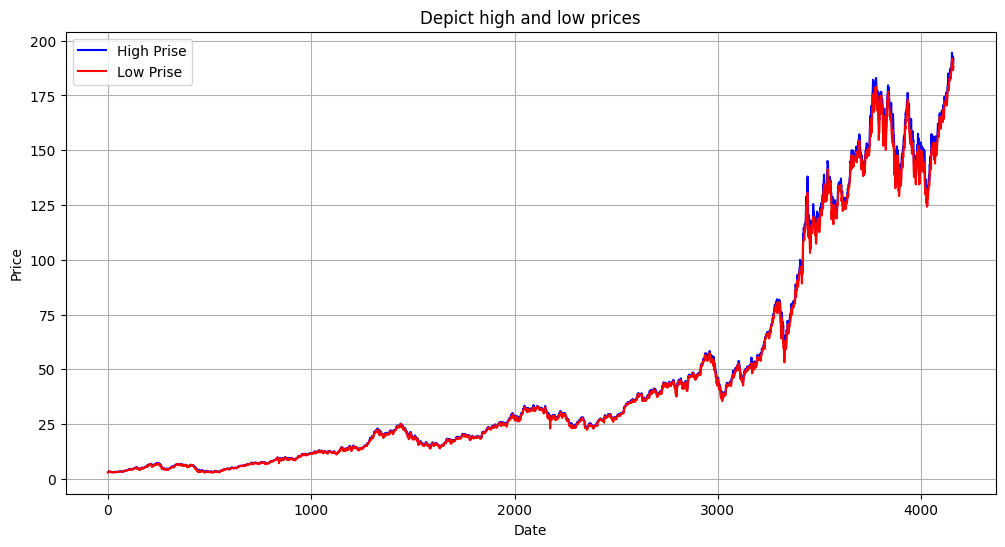

In [77]:
# Calculate a simple moving average (SMA) with a window of 30 days
window_size = 30
sma = df['close'].rolling(window=window_size).mean()

# Plot original closing prices and the moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Closing Price', color='blue')
plt.plot(sma.index, sma, label='30-Day Moving Average', color='red')
plt.title('Closing Prices with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot to depict high and low prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['high'], label='High Prise', color='blue')
plt.plot(df.index, df['low'], label='Low Prise', color='red')
plt.title('Depict high and low prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

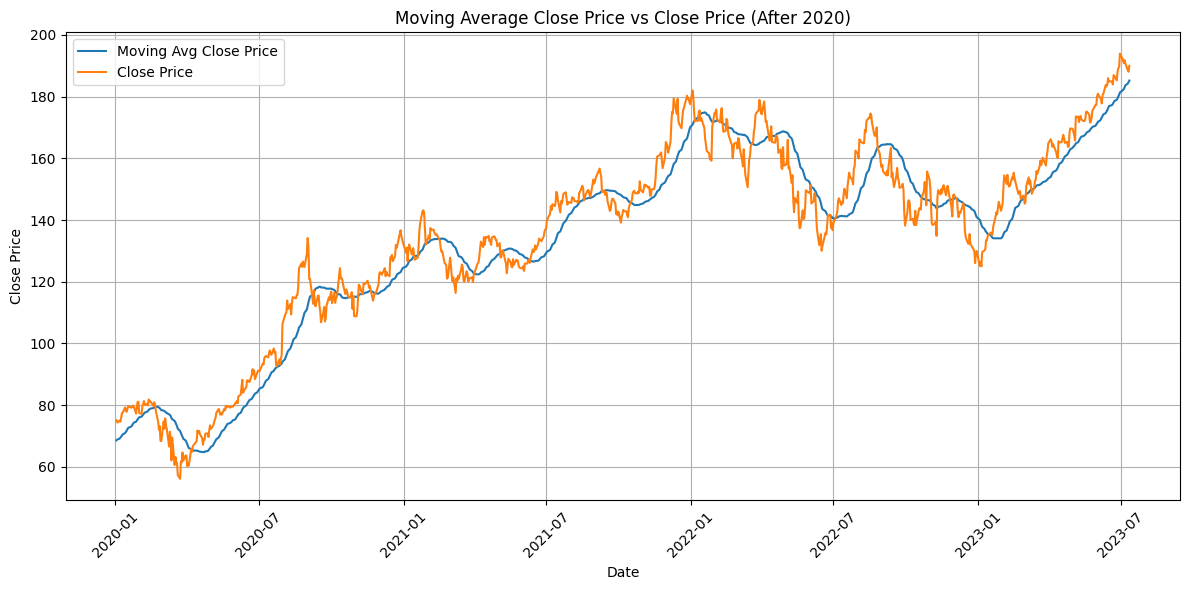

In [78]:
# Filter data for dates after 2020
df_after_2020 = df[df['time'].dt.year >= 2020]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_after_2020['time'], sma[df_after_2020.index], label='Moving Avg Close Price')
plt.plot(df_after_2020['time'], df_after_2020['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Moving Average Close Price vs Close Price (After 2020)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
from scipy import stats

def check_diff_t_test(year1, year2):
    avg_close_for_y1 = df[df['time'].dt.year == year1]['close']
    avg_close_for_y2 = df[df['time'].dt.year == year2]['close']
    t_statistic, p_value = stats.ttest_ind(avg_close_for_y1, avg_close_for_y2)
    if p_value < 0.05:
        return t_statistic, p_value, True
    else:
        return t_statistic, p_value, False

significant_difference = {}

for year in range(2007, 2023):
    year1 = year
    year2 = year + 1
    t_statistic, p_value, significant = check_diff_t_test(year1, year2)
    key = f"{year1}-{year2}"
    significant_difference[key] = {'t_statistic': t_statistic, 'p_value': p_value, 'significant': significant}

# Create DataFrame from dictionary
df_significant_difference = pd.DataFrame.from_dict(significant_difference, orient='index')
df_significant_difference.index.name = 'Year Pair'

# Drop the last row (as it compares the last year with a non-existent year)
df_significant_difference.drop(df_significant_difference.tail(1).index, inplace=True)

# Print the DataFrame
print(df_significant_difference)

           t_statistic        p_value  significant
Year Pair                                         
2007-2008    -4.461286   1.006375e-05         True
2008-2009    -1.471032   1.419079e-01        False
2009-2010   -32.782459  7.525529e-127         True
2010-2011   -36.229467  3.511888e-142         True
2011-2012   -46.845318  5.250699e-185         True
2012-2013    20.335857   1.918964e-67         True
2013-2014   -26.489330   2.167145e-97         True
2014-2015   -28.591097  2.054705e-107         True
2015-2016    22.613444   1.343171e-78         True
2016-2017   -44.193726  5.535462e-175         True
2017-2018   -24.151966   5.488983e-86         True
2018-2019    -7.569352   1.815082e-13         True
2019-2020   -29.299519  7.808255e-111         True
2020-2021   -27.588815  1.007316e-102         True
2021-2022   -11.184013   4.480587e-26         True


For most pairs of consecutive years, the p-value is very small (close to zero), indicating a significant difference in average closing prices between those years.
For a few pairs of consecutive years, such as 2008-2009, 2009-2010, and 2018-2019, the p-value is larger, indicating that there may not be a significant difference in average closing prices between those years.

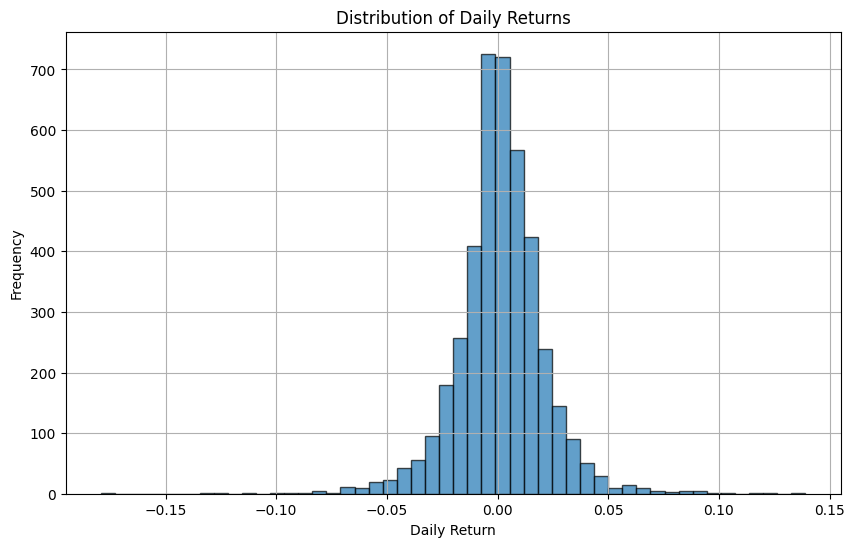

Shapiro-Wilk test: statistic=0.9406672716140747, p-value=6.185059009108278e-38
Kolmogorov-Smirnov test: statistic=0.46906435611670394, p-value=0.0


In [80]:
from scipy.stats import shapiro, kstest

# Calculate daily returns
df['daily_return'] = df['close'].pct_change()

# Remove the first row with NaN value
df.dropna(subset=['daily_return'], inplace=True)

# Visualize the distribution of daily returns using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['daily_return'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Test for normality using Shapiro-Wilk test
shapiro_stat, shapiro_p_value = shapiro(df['daily_return'])
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p_value}")

# Test for normality using Kolmogorov-Smirnov test
ks_stat, ks_p_value = kstest(df['daily_return'], 'norm')
print(f"Kolmogorov-Smirnov test: statistic={ks_stat}, p-value={ks_p_value}")

In [81]:
import numpy as np

Correlation coefficient between moving averages of closing prices and trading volume: -0.5813513279877403


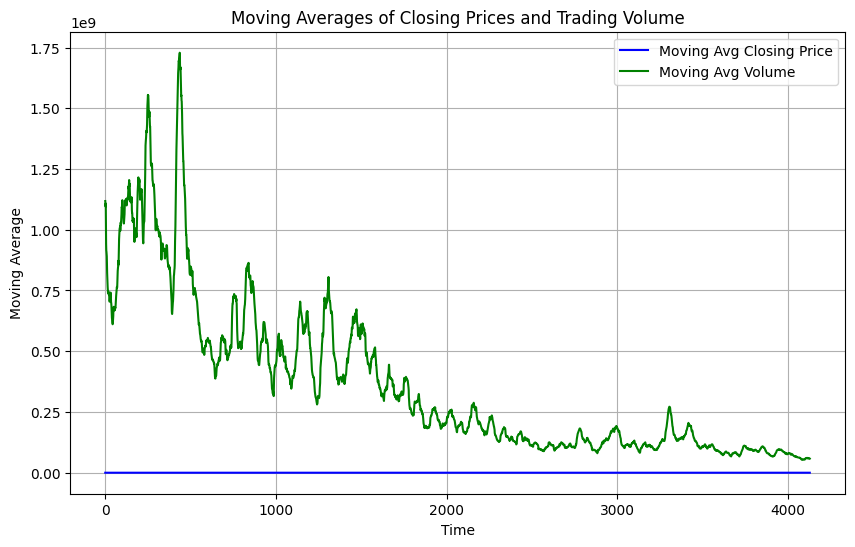

In [90]:
# Calculate moving average for closing prices using np.convolve
window_size = 30  # Adjust window size as needed
closing_prices = df['close'].values
moving_avg_close = np.convolve(closing_prices, np.ones(window_size)/window_size, mode='valid')

# Calculate moving average for trading volume using np.convolve
trading_volume = df['volume'].values
moving_avg_volume = np.convolve(trading_volume, np.ones(window_size)/window_size, mode='valid')

# Compute correlation coefficient between the moving averages
corr_coeff = np.corrcoef(moving_avg_close, moving_avg_volume)[0, 1]

print(f"Correlation coefficient between moving averages of closing prices and trading volume: {corr_coeff}")

# Visualize the moving averages and correlation
plt.figure(figsize=(10, 6))
plt.plot(moving_avg_close, label='Moving Avg Closing Price', color='blue')
plt.plot(moving_avg_volume, label='Moving Avg Volume', color='green')
plt.title('Moving Averages of Closing Prices and Trading Volume')
plt.xlabel('Time')
plt.ylabel('Moving Average')
plt.legend()
plt.grid(True)
plt.show()

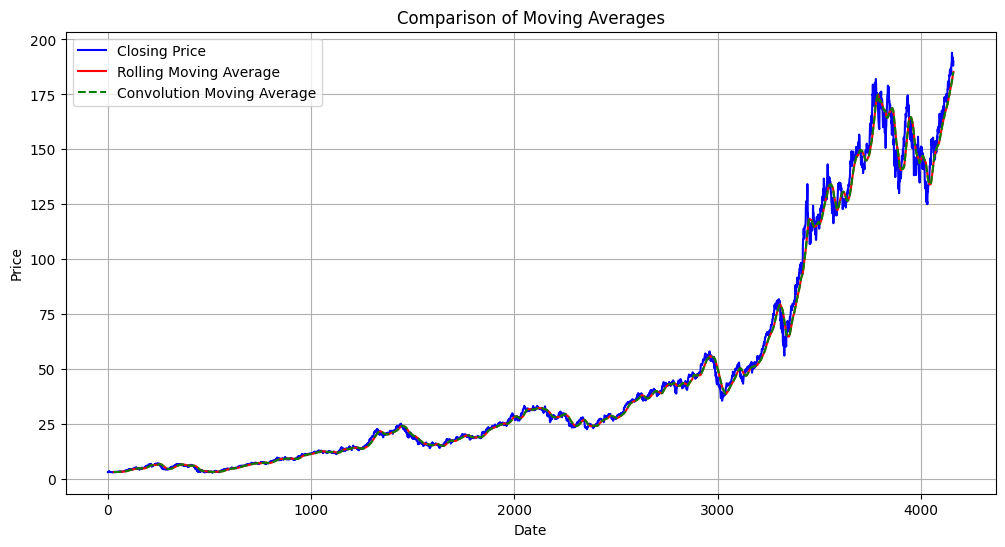

In [85]:
# Calculate moving averages using both approaches
# Rolling method
window_size = 30
sma_rolling = df['close'].rolling(window=window_size).mean()

# Convolution method
closing_prices = df['close'].values
moving_avg_close = np.convolve(closing_prices, np.ones(window_size)/window_size, mode='valid')

# Compare the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Closing Price', color='blue')
plt.plot(sma_rolling.index, sma_rolling, label='Rolling Moving Average', color='red')
plt.plot(df.index[window_size-1:], moving_avg_close, label='Convolution Moving Average', color='green', linestyle='--')
plt.title('Comparison of Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

The correlation coefficient between the moving averages of closing prices and trading volume is approximately -0.581.

This negative correlation suggests that there is a moderate negative linear relationship between the moving averages of closing prices and trading volume. In other words, as the moving average of closing prices tends to increase, the moving average of trading volume tends to decrease, and vice versa.

Interpreting correlation coefficients:

Values close to 1 or -1 indicate a strong positive or negative linear relationship, respectively.
Values close to 0 suggest a weak linear relationship or no relationship at all.
In this case, a correlation coefficient of -0.581 indicates a moderate negative linear relationship between the two variables.